# Análise de Dados com Pandas

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [101]:
# Importar a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [102]:
# Informações dos tipos de dados do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [103]:
# Descrição dos valores numéricos
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [104]:
# Formato da base de dados
df.shape

(133349, 11)

In [105]:
# Quantidade de linhas e colunas
linhas, colunas = df.shape[0], df.shape[1]
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 133349
Colunas: 11


In [106]:
# Nomes das colunas do df
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Renomeando as colunas

In [107]:
# Renomenado as colunas
novos_nomes = {
    'work_year':'ano', 
    'experience_level':'senioridade', 
    'employment_type':'contrato', 
    'job_title':'cargo',
    'salary':'salario', 
    'salary_currency':'moeda', 
    'salary_in_usd':'usd', 
    'employee_residence':'residencia',
    'remote_ratio':'remoto', 
    'company_location':'empresa', 
    'company_size':'tamanho_empresa'    
}

# Aplicando a renomeação
df.rename(columns=novos_nomes, inplace=True)

# Visualizando o df renomeado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


## Analisando quais sãos as categorias das colunas categóricas
### Nivel experiência

In [108]:
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [109]:
siglas_senioridade = {
    'Sigla':['SE', 'MI', 'EN', 'EX'],
    'Significado': ['Senior', 'Pleno', 'Junior', 'Executivo'],
    'Descrição': ['Profissional experiente (nível sênior)', 'Nível intermediário',
                  'Iniciante ou júnior (entry-level)', 'Executivo, liderança sênior (C-Level)']
}

df_senioridade = pd.DataFrame(siglas_senioridade)

# Remover o índice e exibir como tabela
display(df_senioridade.style.hide(axis='index'))

Sigla,Significado,Descrição
SE,Senior,Profissional experiente (nível sênior)
MI,Pleno,Nível intermediário
EN,Junior,Iniciante ou júnior (entry-level)
EX,Executivo,"Executivo, liderança sênior (C-Level)"


### Tipo de contrato

In [110]:
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [111]:
siglas_contrato = {
    'Sigla':['FT', 'CT', 'PT', 'FL'],
    'Significado': ['Tempo Integral', 'Contrato', 'Tempo Parcial', 'Freelance'],
    'Descrição': ['Tempo integral – trabalho padrão de 40h/semana ou período completo', 
                  'Meio período – carga horária reduzida',
                  'Contrato temporário ou por projeto – geralmente por prazo determinado', 
                  'Freelancer – trabalho autônomo ou por demanda, sem vínculo formal']
}

df_contrato = pd.DataFrame(siglas_contrato)

# Remover o índice e exibir como tabela
display(df_contrato.style.hide(axis='index'))

Sigla,Significado,Descrição
FT,Tempo Integral,Tempo integral – trabalho padrão de 40h/semana ou período completo
CT,Contrato,Meio período – carga horária reduzida
PT,Tempo Parcial,Contrato temporário ou por projeto – geralmente por prazo determinado
FL,Freelance,"Freelancer – trabalho autônomo ou por demanda, sem vínculo formal"


### Regime de trabalho

In [112]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [113]:
siglas_remoto = {
    'Sigla':[0, 100, 50],
    'Significado': ['Presencial', 'Remoto', 'Hibrido']
}

df_remoto = pd.DataFrame(siglas_remoto)

# Remover o índice e exibir como tabela
display(df_remoto.style.hide(axis='index'))

Sigla,Significado
0,Presencial
100,Remoto
50,Hibrido


### Tamanho de empresa

In [114]:
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [115]:
siglas_tamanho_empresa = {
    'Sigla':['M', 'L', 'S'],
    'Significado': ['Médio', 'Grande', 'Pequena'],
    'Descrição': ['Empresa de tamanho médio', 'Empresa de tamanho grande', 'Empresa de tamanho pequeno']
}

df_tamanho_empresa = pd.DataFrame(siglas_tamanho_empresa)

# Remover o índice e exibir como tabela
display(df_tamanho_empresa.style.hide(axis='index'))

Sigla,Significado,Descrição
M,Médio,Empresa de tamanho médio
L,Grande,Empresa de tamanho grande
S,Pequena,Empresa de tamanho pequeno


### Modificar o nome das categorias

In [116]:
# Renomear senioridade
senioridade = {
    'SE':'Senior', 
    'MI':'Pleno', 
    'EN':'Junior', 
    'EX':'Executivo'    
}

df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [117]:
# Renomear contrato
contrato = {
    'FT':'Tempo Integral', 
    'CT':'Contrato', 
    'PT':'Tempo Parcial', 
    'FL':'Freelance'
}

df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelance             16
Name: count, dtype: int64

In [118]:
# Renomear remoto
remoto = {
    0:'Presencial', 
    100:'Remoto', 
    50:'Hibrido'    
}

df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Hibrido          319
Name: count, dtype: int64

In [119]:
# Renomear tamanho_empresa
tamanho_empresa = {
    'M':'Médio', 
    'L':'Grande', 
    'S':'Pequena'        
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
Médio      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [120]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [121]:
# Descrição das categorias
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [122]:
# Descrição numéricos
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Com isso já conseguimos responder algumas perguntas, como:

- Qual o nível de experiência mais comum na base de dados?
- Qual é o tipo de contrato mais frequente?
- Qual o cargo mais frequente na amostra?
- De qual país são a maioria dos profissionais da base?
- Qual é o país onde mais empresas da amostra estão sediadas?
- Qual o regime de trabalho mais comum?
- Qual é o tamanho mais comum das empresas na amostra?

O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.

In [123]:
# Verificar os valores nulos
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [124]:
# Somar os valores nulos
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [125]:
# Verificar os valores nulos
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [126]:
# Verificar quais linhas tem o ano NaN
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [127]:
# Criar um novo DataFrame sem as informações vazias
df_limpo = df.dropna()

In [128]:
# Somar todos os valores nulos para cada coluna
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [129]:
# Visualizar os primeiros valores
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [130]:
# O Dtype de ano está como float64
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [131]:
# Transformar float64 para int64
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


In [137]:
# Ordenar os valores de salário (usd) em ordem decrescente
ordem_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

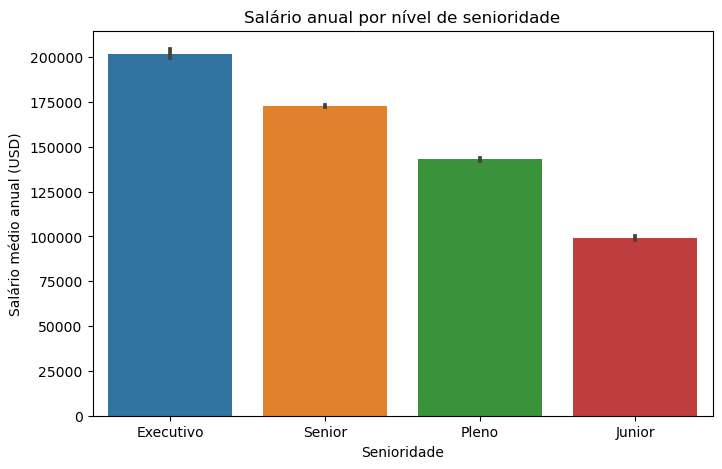

In [136]:
# Gráfico de salários em dólares em função da senioridade

# Tamanho da figura
plt.figure(figsize=(8,5))

# Criar dados e os eixos ordenado por ordem_senioridade
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade)

# Criar o título do gráfico
plt.title('Salário anual por nível de senioridade')

# Criar o rótulo X
plt.xlabel('Senioridade')

# Criar o rótulo Y
plt.ylabel('Salário médio anual (USD)')

# Vizualiar o gráfico
plt.show()

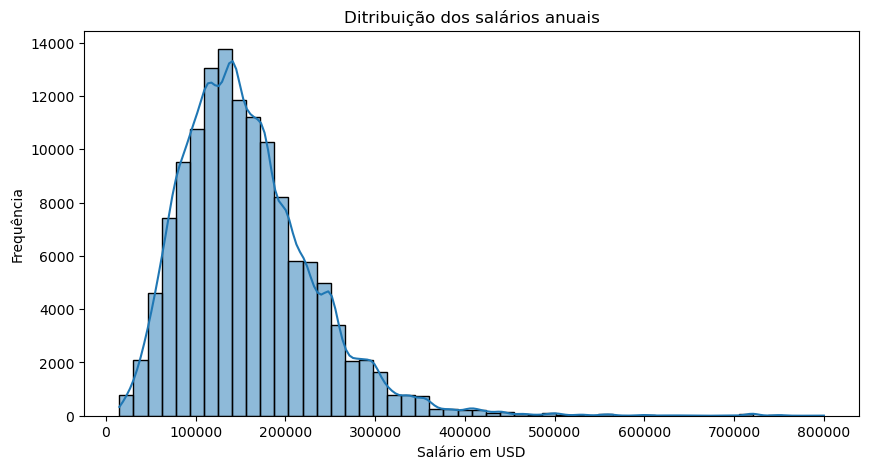

In [144]:
# Histograma dos salários anuais conforme a frequência

plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Ditribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

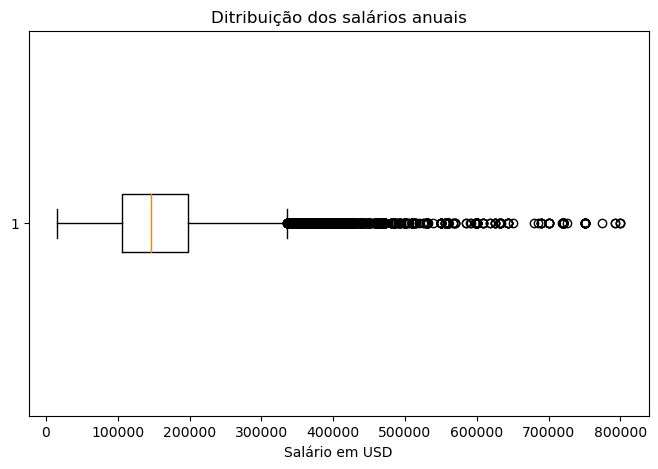

In [151]:
# Boxplot dos salários
plt.figure(figsize=(8,5))
plt.boxplot(x=df_limpo['usd'], vert=False)
plt.title('Ditribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.show()

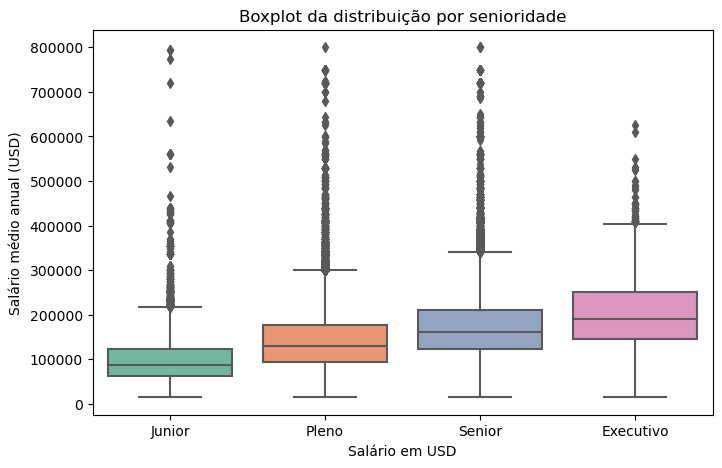

In [161]:
# Boxplot dos salários por ordem de senioridade
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salário em USD')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [171]:
# Criar um gráfico da média salarial por senioridade usando a biblioteca plotly

# Calcular a média salarial por senioridade
media_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Ordenar o DataFrame pela média salarial em ordem decrescente
media_senioridade_ordenada = media_senioridade.sort_values(by='usd', ascending=False)

fig  = px.bar(
    media_senioridade_ordenada,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'},
    color='senioridade')

fig.show()

In [179]:
# Gráfico de pizzas para o tipo de trabalho
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig  = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    hole=0.5)  #Hole transforma a pizza em rosca    

fig.update_traces(textinfo='percent+label')
fig.show()